<h1><center>Omar Khaled Allam</center></h1>
<h2><center>First Task : Exploratory Data Analysis - Retail</center></h2>
<h3><center>Dataset: SampleSuperStore</center></h3>
<h3><center>#GRIPFEBRUARY22</center></h3>

# Columns' summary:

 `Ship Mode`   : Mode of delivering goods.
 <br> `Segment`     : Type of customer that receives the goods.  
 <br> `Country`     : Country of final destination.
 <br> `City`        : City name in which the customer lives.   
 <br> `State`       : State which the city belongs to. 
 <br> `Postal Code` : Postal in the specific state.
 <br> `Region`      : Country region in which the state is locatd.
 <br> `Category`    : Genearl Category of delivered goods. 
 <br> `Sub-Category`: Specific type in each general category.
 <br> `Sales`       : Amount of Sales in USA dollar for all delivered quantities of a specific entry. 
 <br> `Quantity`    : Number of delivered pieces of a specific category for each entry.
 <br> `Discount`    : Percent of discount applied on the Price of this piece of goods.
 <br> `Profit`      : Amount of Profit earned in USA dollar for each entry.


# Importing and Overviewing:

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [19]:
df = pd.read_csv('SampleSuperstore.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [20]:
for col in df.columns:
    print("\n" + col)
    print(df[col].nunique() , df[col].dtypes )
    if (df[col].dtypes == object):
        print(df[col].unique())


Ship Mode
4 object
['Second Class' 'Standard Class' 'First Class' 'Same Day']

Segment
3 object
['Consumer' 'Corporate' 'Home Office']

Country
1 object
['United States']

City
531 object
['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San

# Cleaning:
- First we drop any duplicated rows.

In [4]:
df.duplicated().sum()
df.drop_duplicates(inplace=True,ignore_index = True) 

- From the previous: it appears that `Country` Column doesn't make any sense as it contains the same value.'it only makes us know the currency used is USA dollar'
<br>
- And also `Postal Code` doesn't affect our judgement.

In [5]:
df.drop(columns = ['Country','Postal Code'],axis=1,inplace =True)

# Exploratory Questions:
- How are the main objectives of the data `Sales` & `Profit` related to each other? <br> 
- What factors affect the `Profit` & `Sales`?

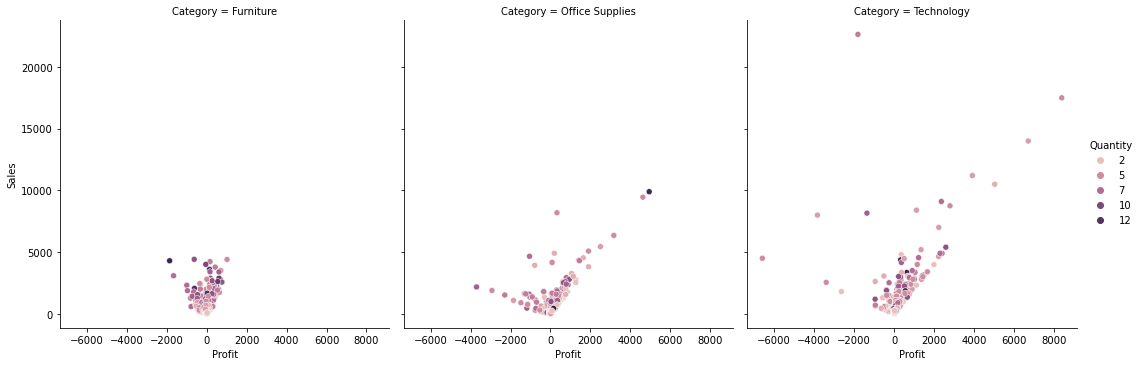

In [21]:
sns.relplot(x='Profit',y='Sales',kind = 'scatter',hue='Quantity',col='Category',data=df)

### **Hence, we should split the data to independentely consider -ve part & +ve part of the `Profit`:
### First:
We'll work on the `negative_profit` to make it less negative. 


count    1871.000000
mean      -83.448042
std       284.423422
min     -6599.978000
25%       -58.660950
50%       -18.088200
75%        -6.261500
max        -0.089500
Name: Profit, dtype: float64


-137.26012500000002

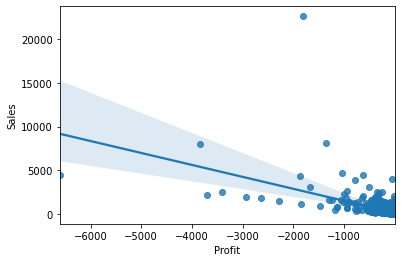

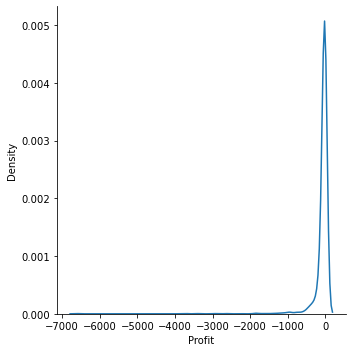

In [22]:
negative_profit = df[df['Profit']<0]

# plotting Sales vs negative_profit to know at which specific profit we should work ... 

sns.regplot(x='Profit',y='Sales',data=negative_profit)

sns.displot(x='Profit',data=negative_profit,kind='kde')

print( negative_profit['Profit'].describe() )


# using the formula (1.5 IQR) to depect the outliers limit to work:

Q1 = np.quantile(negative_profit['Profit'],0.25)
Q3 = np.quantile(negative_profit['Profit'],0.75)

Outlier_left_limit = Q1 - ( 1.5* (Q3-Q1) )
Outlier_left_limit



Here we figures out the -ve profit and what are its causes ... They may be due to:<br>
- high 'Discount'. 
- `negative_profit` may have a relation with the `Quantity`.
- each `Sub-Category` may possess a relation with `negative_profit`.
<br>
<br>
So the following visualizations will illustrate that.

count    9994.000000
mean        0.156203
std         0.206452
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-23-40d0af3e3570>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_profit['Metric'] = negative_profit['Discount']*np.log(negative_profit['Quantity'])


Text(0.5, 0.98, 'Sub-Category  vs  Metric')

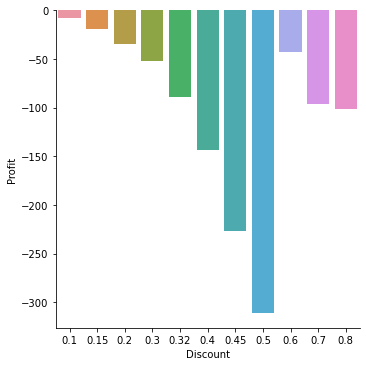

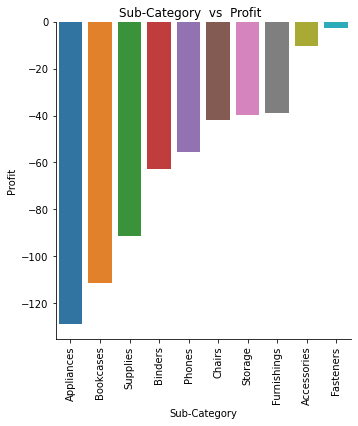

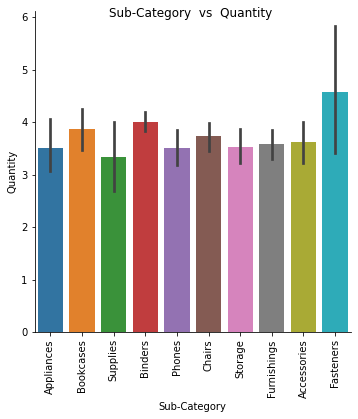

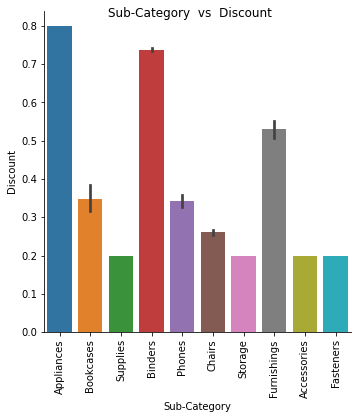

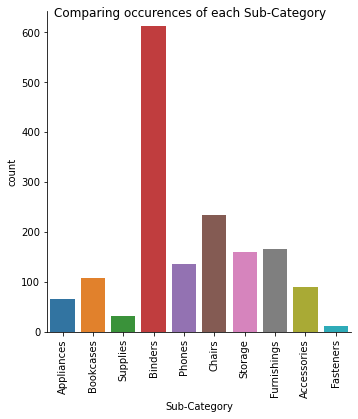

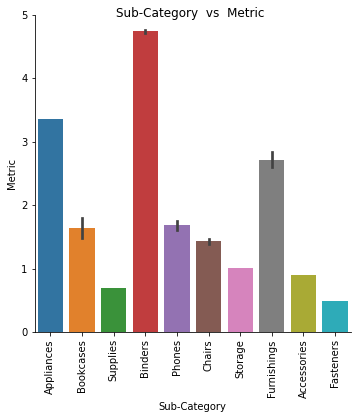

In [23]:
print( df['Discount'].describe() )

# 1st Plot
sns.catplot(kind='bar',x='Discount',y='Profit',data=negative_profit,ci=None)
# from this plot, we saw there is a direct 'logarthimic' relation between -veProfit & discount but until 0.5
# this will be justified at the end of the notebok but anyway, it doesn't affect our method of judgement.



n = negative_profit.groupby(['Sub-Category']).agg({'Quantity':'mean','Discount':'mean','Profit':'mean'}).sort_values('Profit').reset_index()
n_without_outlier = n[n['Profit']>Outlier_left_limit]   # doesn't contain two Sub-Categories (Machines-Tables)


g = sns.catplot(x='Sub-Category',y='Profit',data =n_without_outlier,kind='bar',order=n_without_outlier['Sub-Category'])
g.set_xticklabels(rotation=90)
g.fig.suptitle('Sub-Category  vs  Profit',y=1)


# 2nd Plot
r= sns.catplot(x='Sub-Category', y='Quantity', data = negative_profit,kind='bar',order=n_without_outlier['Sub-Category'])
r.set_xticklabels(rotation=90)
r.fig.suptitle('Sub-Category  vs  Quantity')
# as 'Quantity' is almost the same in all of the plot, it doesn't affect our results.



# 3rd Plot
l= sns.catplot(x='Sub-Category', y='Discount',data = negative_profit,kind='bar',order=n_without_outlier['Sub-Category'])
l.set_xticklabels(rotation=90)
l.fig.suptitle('Sub-Category  vs  Discount')



# 4th Plot
w= sns.catplot(x='Sub-Category', data = negative_profit,kind='count',order=n_without_outlier['Sub-Category'])
w.set_xticklabels(rotation=90)
w.fig.suptitle('Comparing occurences of each Sub-Category')


# Following lines of code are to create a new column called 'Metric'.
# This 'Metric' column is a measure of people's needs for a specific 'Sub-Category'.
# More in 'Metric' value , means more needs.

for i in range(0,12):
    indices   = negative_profit['Sub-Category'].value_counts().reset_index()['index'][i]
    indices_v = negative_profit['Sub-Category'].value_counts().reset_index()['Sub-Category'][i]
    negative_profit.loc[negative_profit['Sub-Category']==indices, 'Quantity'] = indices_v

negative_profit['Metric'] = negative_profit['Discount']*np.log(negative_profit['Quantity'])

q= sns.catplot(x='Sub-Category',y='Metric', data = negative_profit,kind='bar',order=n_without_outlier['Sub-Category'])
q.set_xticklabels(rotation=90)
q.fig.suptitle('Sub-Category  vs  Metric')








,Sub-Category,Metric
5,Fasteners,0.496981
10,Supplies,0.699302
0,Accessories,0.902172
9,Storage,1.016281
4,Chairs,1.426462
3,Bookcases,1.635085
8,Phones,1.683307
11,Tables,1.940760
7,Machines,2.201710
6,Furnishings,2.715295


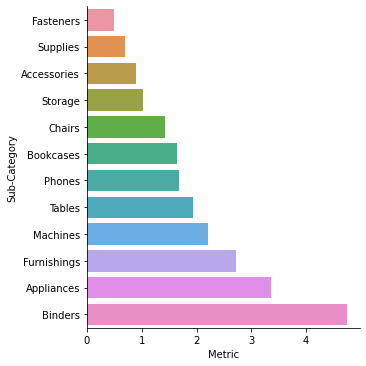

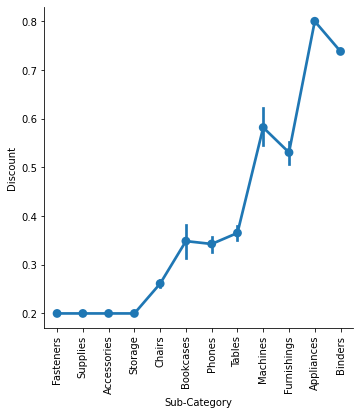

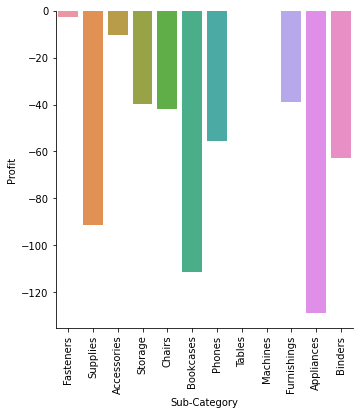

In [24]:
# Summary of the previous graphs insights are represented in this cell:

decision = negative_profit.groupby('Sub-Category')['Metric'].mean().reset_index().sort_values('Metric')

sns.catplot(x='Metric',y='Sub-Category',data = decision,kind='bar')
sns.catplot(x='Sub-Category', y='Discount',data = negative_profit,kind='point',order=decision['Sub-Category'])
plt.xticks(rotation=90)
sns.catplot(x='Sub-Category',y='Profit',data = n_without_outlier,kind='bar',order=decision['Sub-Category'])
plt.xticks(rotation=90)


decision


# Qualitative Insights:
- `negative_profit` depends mainly on `Discount` and `Sub-Category`
- we formed a `Metric` table to judge the priorities that can be taken into consideration and appears that:
<br><br> (Binders > Appliances > Furnishing > Machines > Tables > Phones > Bookcases > Chairs > Storage > Accessories > Supplies > Fasteners)

# Quantitave Insights:
1- `Supplies` its need is low as its Metric is low but its profit is highly negative. so we must lower discount as we must:
<br>
&emsp;&emsp; -eleminate its `Discount`. 
<br> <br>
* this increase the profit (zero ---> -110 at old 'Supplies') : zero + 110 = `110 Profit Unit`
<br>

2- `Bookcases`its need is moderate but its profit is highly negative. 
<br>
&emsp;&emsp; -so we suggest to lower its `Discount` to be 0.2 instead of ~ 0.4 (this ration simulates 'Storage')
<br> <br>
* this increase the profit (-40 at 'Storage' ---> -110 at old 'Bookcases') : -40 + 110 = `70 Profit Unit`
<br>


3- `Appliances` its need is high but its profit is highly negative.
<br>
&emsp;&emsp; -so we suggest to lower its `Discount` but wisely to be 0.5 instead of ~ 0.8 (this ration simulates 'Furnishings') 
<br> <br>
* this increase the profit (-40 at 'Furnishings' ---> -130 at old 'Appliances') : -40 + 130 = `90 Profit Unit`

### So total profit raisng is suggested to be (110+70+90) = 270 Profit Unit

Other Columns can be treated following the previous mehtodology.

<br>
<h2><center>*** Second Part ***<center><h2>

# Second,
### we work on the `positive_profit` to make it more positive. 


count    8058.000000
mean       54.917884
std       213.713980
min         0.062800
25%         5.324550
50%        13.317600
75%        40.465550
max      8399.976000
Name: Profit, dtype: float64


93.17705000000001

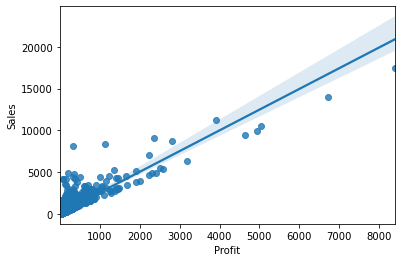

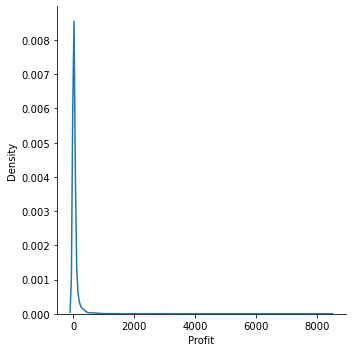

In [25]:
positive_profit = df[df['Profit']>0]

# plotting the sale vs positive_profit to know at which specific profit should we work and set our outliers ...
# and therefore see the discount within this profit.

sns.regplot(x='Profit',y='Sales',data=positive_profit)
sns.displot(x='Profit',data=positive_profit,kind='kde')

print ( positive_profit['Profit'].describe() )

# using the formula (1.5 IQR) to depect the outliers limit to work:
Q1 = np.quantile(positive_profit['Profit'],0.25)
Q3 = np.quantile(positive_profit['Profit'],0.75)

Outlier_Right_limit = Q3 + (1.5* (Q3-Q1))
Outlier_Right_limit    # we will use to as an effective value to work on for decision making



,index,Category
0,Office Supplies,4.139130
1,Technology,1.043478
2,Furniture,1.000870


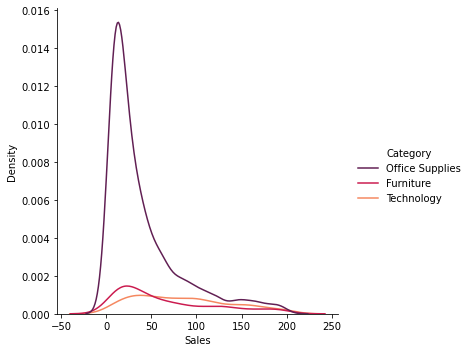

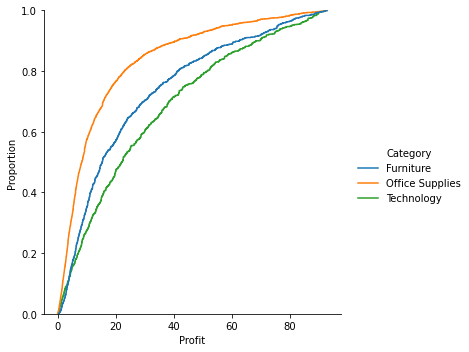

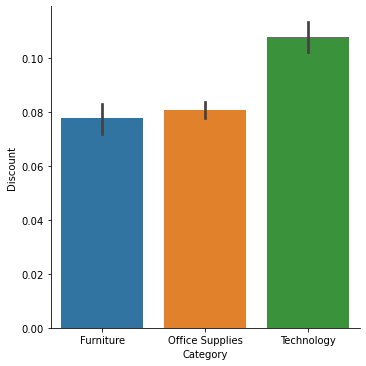

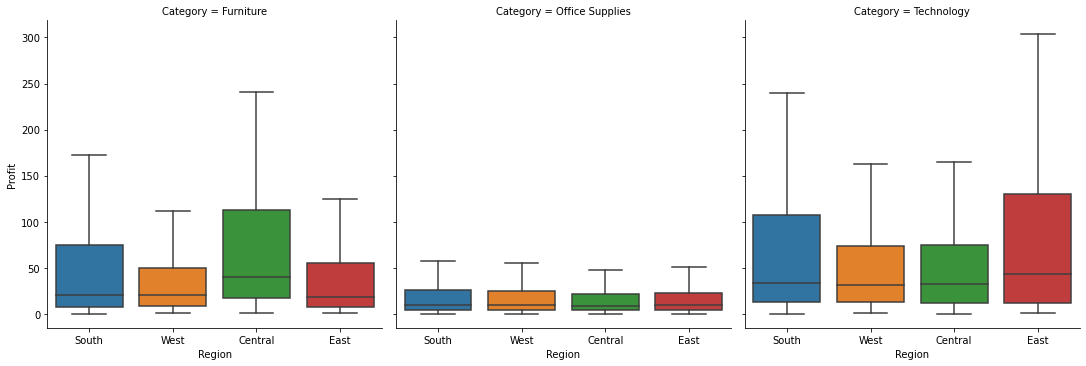

In [26]:
without_outlier = positive_profit[positive_profit['Profit']<Outlier_Right_limit ]

w = without_outlier[without_outlier['Sales']<200]  # this '200' to make the kde easy to be interpreted.
sns.displot(kind='kde',x='Sales',hue='Category',data=w,palette = 'rocket')


sns.displot(kind='ecdf',x='Profit',hue='Category',data=without_outlier)

# the density of 'Office Supplies' > 'Furniture' ~= 'Technology' 
# if we have the same percentage of each Category, then profit of 'technology' > 'furniture' > 'Office Supplies'



# COnsequently, because 'technology' gives higher profit, then we will try to decrease its discount to raise the profit more.
sns.catplot(x='Category',y='Discount',kind='bar',data=without_outlier)


sns.catplot(kind='box',y='Profit',x='Region',col='Category',data=positive_profit,sym='',legend=True) 
#This asserts that 'Region' doesn't affect the Sales by a measurable amount.


ser = without_outlier['Category'].value_counts().reset_index()
ser['Category'] = ser['Category']/1150
ser


# Qualitative Insights:

#### we have noticed:
- From 1st graph: `Sales` mean of `technology` >~= `Furniture` > `Office Supplies` ***but***
- From 2nd graph: at the same percentage of the data , `Profit` of ( `technology` > `Furniture` > `Office Supplies`) .
<br>Out of the above two notes:
   - `Sales` and `Profit` are directly-related for Categories. This means if we increase the `Profit`, `Sales` will increase. 
<br>
<br>
- So, f we increase the `technology` percent more than other two Categories, we will obtain higher Profit.
<br>
To do this , we studied:
1) the peaople's tendency percentage among the three catigories as in the table above. 
2) their avg_discount as in plot 3

# Specific Qualitative Insights:

It appears that: 
 - as people tend highly to buy `Office Supplies` , so we may lower its `Discount` greatly without no considerable bad effect because its `Profit` is lower than of the two.
 - as `technology` and `furniture` are of the same tendency among people, but `Profit` of `technology` is greater ... so we can sacrifice and increase the `Dicount` by small amount but this will increase the `Profit` by large amount as people will tend to buy more and more.






#### This code below is just for assertion:


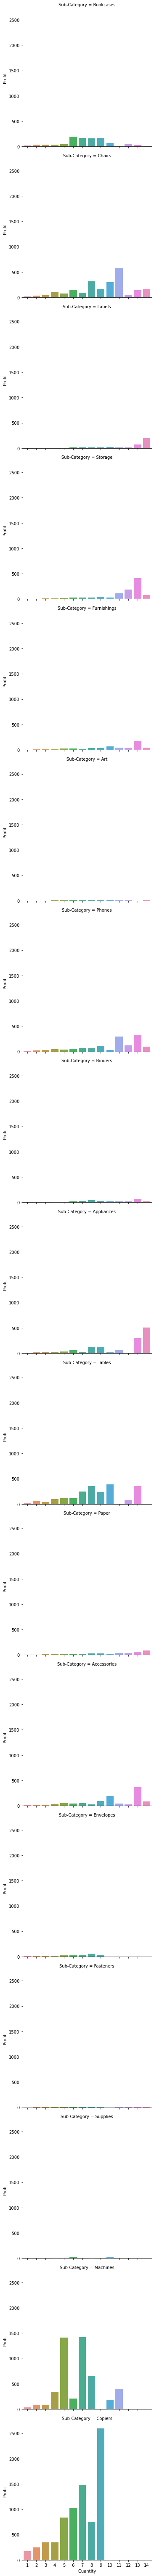

In [27]:
#this last graph is to assert that 'State' column has no effect on the 'Profit' so we won't take it into consideration.

sns.catplot(x='Quantity',y='Profit',data = positive_profit, kind='bar', row = 'Sub-Category',estimator = np.median,ci=None)


# From the below graph, we made asserion that our splitting to study -ve and +ve works because:
#      - In Sub-Categories below, the ones that shows high -ve profit shows the least +ve Profit here 
#        So our two splitted data are related